##### Task (20 Points)

In [ ]:
""" 
    topic: dijkstra

    a) 
    change the Graph class such that you accept coordinates

    b)
    implement plot_graph()

    c) 
    implement weights()

    d)
    implement dijkstra()

    e)
    find the shortest path from 103 to 1758
"""

In [54]:
import numpy as np
import matplotlib.pyplot as plt

class Graph:
    invalid_node = -1
    def __init__(self, numorfile, x_coord=None, y_coord=None, directed=False):
        self._directed = directed

        if type(numorfile) == int:
            self._nodes = [self.Node() for i in range(numorfile)]
        elif type(numorfile) == str:
            with open(numorfile, "r") as file,open(x_coord,"r") as X, open(y_coord,"r") as Y:
                numnodes = int(file.readline())
                x = list(X.readlines())
                y = list(Y.readlines())
                self._nodes = [self.Node(float(x[i]),float(y[i])) for i in range(numnodes)]
                for line in file:
                    tail = int(line.split()[0])
                    head = int(line.split()[1])
                    if tail != head:
                        self.add_edge(tail, head)
                    else:
                        raise RuntimeError("Invalid file format: loops not allowed")
        else:
            raise NotImplementedError("Type of Argument not allowed")

    def num_nodes(self):
        return len(self._nodes)

    def add_nodes(self, num_new_nodes):
        self._nodes.extend([self.Node() for i in range(num_new_nodes)])

    def add_edge(self, tail, head):
        if tail >= self.num_nodes() or tail < 0 or head >= self.num_nodes() or head < 0:
            raise ValueError("Edge cannot be added due to undefined endpoint")
        self._nodes[tail].add_neighbor(head)
        if not self._directed:
            self._nodes[head].add_neighbor(tail)

    def get_node(self, nodeId):
        if nodeId < 0 or nodeId >= self.num_nodes():
            raise ValueError("Invalid nodeId")
        return self._nodes[nodeId]

    def __str__(self):  # for printing
        out = ""
        if self._directed:
            out += "Digraph "
        else:
            out += "Undirected Graph "
        out += "with {} vertices, numbered 0, ..., {}\n".format(
            self.num_nodes(), self.num_nodes() - 1
        )
        for nodeId in range(self.num_nodes()):
            if self._directed:
                s = "leaving"
            else:
                s = "incident to"
            out += "The following edges are " + s + " vertex {}:\n".format(nodeId)
            for neighbor in self._nodes[nodeId].adjacent_nodes():
                out += "{} - {}\n".format(nodeId, neighbor.id())
        return out

    def is_simple(self):
        for nodeId in range(self.num_nodes()):
            nachbarsliste = []
            for neighbor in self._nodes[nodeId].adjacent_nodes():
                nachbarsliste.append(neighbor.id())

            unique_nachbarsliste = []
            for nachbar in nachbarsliste:
                if nachbar not in unique_nachbarsliste:
                    unique_nachbarsliste.append(nachbar)
                else:
                    return False

        return True
    
    def components(self):
        components = []
        visited_nodes = set()

        for nodeId in range(self.num_nodes()):
            if nodeId not in visited_nodes:
                start_node = nodeId
                nodes, _ = DFS(self, start_node)
                components.append(nodes)
                visited_nodes.update(nodes)

        return components

    def adjancency_matrix(self):
        num_nodes = self.num_nodes()
        matrix = [[0] * num_nodes for _ in range(num_nodes)]

        for nodeId in range(num_nodes):
            neighbors = self._nodes[nodeId].adjacent_nodes()
            for neighbor in neighbors:
                matrix[nodeId][neighbor.id()] = 1
        return np.array(matrix)
    
    def plot_graph(self):
        if len(self._nodes) == 0:
            print("Graph is empty.")
            return

        for nodeId in range(self.num_nodes()):
            x, y = self._nodes[nodeId].coordinates()

            for neighbor in self._nodes[nodeId].adjacent_nodes():
                neighbor_id = neighbor.id()
                nx, ny = self._nodes[neighbor_id].coordinates()
                plt.plot([x, nx], [y, ny], color='black',linewidth=0.4)

        plt.title("Graph Visualization")
        plt.show()


    class Node:
        def __init__(self,x,y):
            self._neighbors = []
            self._x = x
            self._y = y

        def add_neighbor(self, nodeId):
            self._neighbors.append(Graph.Neighbor(nodeId))

        def adjacent_nodes(self):
            return self._neighbors

        def number_of_neighbors(self):
            return len(self._neighbors)
        
        def coordinates(self):
            return self._x, self._y

    class Neighbor:
        def __init__(self, nodeId):
            self._id = nodeId

        def id(self):
            return self._id

In [55]:
g = Graph("graph.txt","xcoords.txt","ycoords.txt")

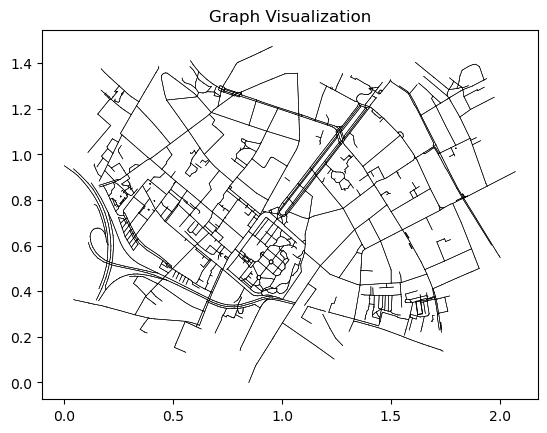

In [56]:
g.plot_graph()